# Importing Libraries

In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.preprocessing import LabelEncoder

# Dataset Preprocessing

In [239]:
df = pd.read_csv('Frogs_MFCCs.csv').dropna(axis=0)
#Shuffling
df = df.sample(frac=1).reset_index(drop=True)
df.head(100)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.394535,0.215789,0.516494,0.142428,0.006047,-0.122273,0.042397,0.245327,0.010102,...,0.160435,0.024011,-0.069898,-0.098911,0.065254,0.202710,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,23
1,1.0,0.267075,0.734518,0.515578,0.023018,-0.066572,-0.042695,0.337820,0.123258,-0.162828,...,-0.019081,0.000530,0.016476,-0.004569,0.054870,0.047455,Hylidae,Scinax,ScinaxRuber,57
2,1.0,0.470186,0.291553,0.503231,0.192809,0.089623,-0.081718,0.002110,0.184310,0.093598,...,0.210707,0.008681,-0.057381,-0.140977,-0.020793,0.204022,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
3,1.0,0.537333,0.871296,0.067063,-0.062297,0.232446,0.078746,-0.002061,-0.019038,0.166368,...,0.049913,0.045623,-0.049648,0.008509,0.055170,-0.026184,Hylidae,Osteocephalus,OsteocephalusOophagus,49
4,1.0,0.439320,0.415366,0.613083,0.082995,-0.011207,-0.048723,0.074690,0.245932,-0.014333,...,0.154570,-0.011551,-0.072136,-0.107175,0.042397,0.209168,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.372097,0.275669,0.533211,0.169402,0.052393,-0.151355,-0.034512,0.271624,0.012752,...,0.155200,-0.044041,-0.099223,-0.078350,0.118328,0.199681,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,14
96,1.0,0.674056,0.648854,0.309726,0.030414,0.198156,0.010837,0.144960,0.123824,-0.292967,...,-0.194684,-0.015789,-0.038946,0.026594,0.012330,-0.212968,Hylidae,Hypsiboas,HypsiboasCinerascens,36
97,1.0,0.610940,0.631737,0.324963,-0.019773,0.185460,-0.002891,-0.061038,0.169302,0.100174,...,-0.008417,0.016877,0.019897,-0.104455,-0.026010,0.084664,Hylidae,Hypsiboas,HypsiboasCordobae,42
98,1.0,0.309286,-0.076083,-0.036950,-0.017738,0.370032,0.562586,0.191680,-0.345951,-0.343723,...,-0.230722,-0.035997,-0.015390,-0.008444,0.152844,0.131876,Dendrobatidae,Ameerega,Ameeregatrivittata,12


In [240]:
for i in df.select_dtypes('object').columns:
    df[i] = df[i].astype('category').cat.codes

In [241]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.394535,0.215789,0.516494,0.142428,0.006047,-0.122273,0.042397,0.245327,0.010102,...,0.160435,0.024011,-0.069898,-0.098911,0.065254,0.202710,3,0,1,23
1,1.0,0.267075,0.734518,0.515578,0.023018,-0.066572,-0.042695,0.337820,0.123258,-0.162828,...,-0.019081,0.000530,0.016476,-0.004569,0.054870,0.047455,2,7,9,57
2,1.0,0.470186,0.291553,0.503231,0.192809,0.089623,-0.081718,0.002110,0.184310,0.093598,...,0.210707,0.008681,-0.057381,-0.140977,-0.020793,0.204022,3,0,1,22
3,1.0,0.537333,0.871296,0.067063,-0.062297,0.232446,0.078746,-0.002061,-0.019038,0.166368,...,0.049913,0.045623,-0.049648,0.008509,0.055170,-0.026184,2,5,7,49
4,1.0,0.439320,0.415366,0.613083,0.082995,-0.011207,-0.048723,0.074690,0.245932,-0.014333,...,0.154570,-0.011551,-0.072136,-0.107175,0.042397,0.209168,3,0,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,0.214015,0.292248,0.626147,0.178369,0.004274,-0.115288,0.092348,0.296521,-0.018990,...,0.209258,-0.119562,-0.165175,-0.053180,0.161964,0.115324,3,0,1,24
7191,1.0,0.545743,0.717485,0.463614,-0.205846,0.012072,0.400155,0.012867,-0.356381,0.150169,...,0.096030,0.219422,-0.039321,-0.060628,0.065026,0.004047,3,0,0,8
7192,1.0,0.274610,0.006190,0.156349,0.252769,0.225683,0.078024,-0.124724,-0.153069,0.044716,...,0.025490,0.093750,-0.014918,-0.078661,-0.009220,0.023000,1,1,2,9
7193,1.0,0.489764,0.457083,0.243351,0.021825,0.161344,0.046027,-0.052587,0.059768,0.081750,...,-0.006105,-0.012578,0.016080,-0.011606,0.009845,0.042574,2,3,5,40


## Normalizing

In [246]:
# normalizing
# scaler = preprocessing.MinMaxScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# scaler = preprocessing.StandardScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

scaled_df = df
scaled_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.394535,0.215789,0.516494,0.142428,0.006047,-0.122273,0.042397,0.245327,0.010102,...,0.160435,0.024011,-0.069898,-0.098911,0.065254,0.202710,3,0,1,23
1,1.0,0.267075,0.734518,0.515578,0.023018,-0.066572,-0.042695,0.337820,0.123258,-0.162828,...,-0.019081,0.000530,0.016476,-0.004569,0.054870,0.047455,2,7,9,57
2,1.0,0.470186,0.291553,0.503231,0.192809,0.089623,-0.081718,0.002110,0.184310,0.093598,...,0.210707,0.008681,-0.057381,-0.140977,-0.020793,0.204022,3,0,1,22
3,1.0,0.537333,0.871296,0.067063,-0.062297,0.232446,0.078746,-0.002061,-0.019038,0.166368,...,0.049913,0.045623,-0.049648,0.008509,0.055170,-0.026184,2,5,7,49
4,1.0,0.439320,0.415366,0.613083,0.082995,-0.011207,-0.048723,0.074690,0.245932,-0.014333,...,0.154570,-0.011551,-0.072136,-0.107175,0.042397,0.209168,3,0,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,0.214015,0.292248,0.626147,0.178369,0.004274,-0.115288,0.092348,0.296521,-0.018990,...,0.209258,-0.119562,-0.165175,-0.053180,0.161964,0.115324,3,0,1,24
7191,1.0,0.545743,0.717485,0.463614,-0.205846,0.012072,0.400155,0.012867,-0.356381,0.150169,...,0.096030,0.219422,-0.039321,-0.060628,0.065026,0.004047,3,0,0,8
7192,1.0,0.274610,0.006190,0.156349,0.252769,0.225683,0.078024,-0.124724,-0.153069,0.044716,...,0.025490,0.093750,-0.014918,-0.078661,-0.009220,0.023000,1,1,2,9
7193,1.0,0.489764,0.457083,0.243351,0.021825,0.161344,0.046027,-0.052587,0.059768,0.081750,...,-0.006105,-0.012578,0.016080,-0.011606,0.009845,0.042574,2,3,5,40


In [247]:
x = scaled_df.drop(['Family'],axis=1)
y = scaled_df['Family'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20)

In [248]:
x_valid

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Genus,Species,RecordID
2543,1.000000,0.140063,0.024609,0.299903,0.277224,0.182884,0.016357,-0.219096,-0.065059,0.356291,...,-0.022651,-0.161842,-0.179941,-0.052002,0.188290,0.199573,-0.052445,0,0,4
1565,1.000000,0.267708,0.765640,0.360772,-0.303831,0.417777,0.424693,-0.233935,-0.004182,0.229250,...,-0.057707,0.107402,0.020817,-0.022804,0.034587,0.095590,-0.035022,4,6,47
1877,1.000000,0.698273,0.684580,0.451619,0.050076,0.070410,-0.124210,0.175385,0.307118,-0.239319,...,0.172252,-0.118211,-0.046612,-0.044291,0.108832,0.064347,-0.204613,3,4,36
5449,1.000000,0.202650,0.143126,0.514337,0.210715,0.051945,-0.129845,-0.021634,0.206101,0.019852,...,-0.022845,0.218563,0.096637,-0.128033,-0.206245,0.016843,0.218825,0,1,16
2365,1.000000,0.359166,0.016131,0.076146,0.178700,0.198111,0.111096,0.004887,0.039826,0.099329,...,0.095826,-0.072037,-0.143450,-0.094944,0.047270,0.113372,0.050576,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6702,0.756179,0.577660,1.000000,0.313445,-0.161369,0.284522,0.193954,-0.160757,0.155148,0.007501,...,-0.030383,-0.055271,-0.036439,0.037823,0.055716,-0.031414,-0.127805,3,4,37
6899,1.000000,0.062590,0.130510,0.460425,0.085099,-0.033405,-0.112546,0.052770,0.291180,0.074378,...,0.164114,0.176763,-0.016809,-0.095981,-0.101811,0.101536,0.165841,0,1,18
2449,1.000000,0.531639,0.575564,0.448831,-0.173337,-0.030130,0.387447,0.033676,-0.266570,0.208906,...,-0.195874,0.041271,0.111272,-0.150179,-0.056041,0.099622,0.033349,0,0,8
4799,1.000000,0.289183,0.295984,0.465771,0.041543,-0.085012,-0.124270,0.089613,0.272150,-0.010591,...,0.105440,0.234658,0.009715,-0.085580,-0.072141,0.110529,0.242395,0,1,23


## Linear

In [249]:
clf = LinearSVC(C=100, random_state=0, tol=5e-5, max_iter=10000)
clf.fit(x_train, y_train)

y_train_predicted = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print(f"accuracy on training set : {accuracy_score(y_true=y_train, y_pred=y_train_predicted)}")
print(f"accuracy on tes set : {accuracy_score(y_true=y_test, y_pred=y_test_pred)}")



accuracy on training set : 0.9538232373386296
accuracy on tes set : 0.9597035664659564


C:\Users\98912\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [250]:
decision_function = clf.decision_function(x_train)
support_vector_indices = np.unique(np.where(np.abs(decision_function) <= 1+1e-16)[0])
support_vectors = x_train.iloc[support_vector_indices.tolist()]
print(f"number of support vectors = {len(support_vector_indices)}")
print(support_vectors)

number of support vectors = 1191
      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
3739       1.0  0.428562  0.331280  0.568821  0.160348 -0.030634 -0.093677   
5264       1.0  0.314321  0.438354  0.312396 -0.059697  0.230965  0.162220   
652        1.0  0.297563  0.147606  0.300054  0.178587  0.115565  0.078082   
4093       1.0  0.708238  0.316171  0.461256  0.166793  0.058864  0.012079   
6454       1.0  0.085910  0.111406  0.665573  0.276899  0.050165 -0.149894   
...        ...       ...       ...       ...       ...       ...       ...   
4506       1.0  0.262407  0.222710  0.570722  0.209076  0.083074 -0.091782   
1600       1.0  0.261746  0.987652  0.420321 -0.293446  0.375003  0.287780   
1755       1.0  0.132460  0.181839  0.591291  0.257924  0.041999 -0.158850   
7094       1.0  0.657458  0.336830  0.614167  0.264011  0.122441 -0.091635   
3751       1.0  0.388989  0.220987  0.515028  0.269032  0.141863 -0.110565   

      MFCCs_ 8  MFCCs_ 9  MFCC

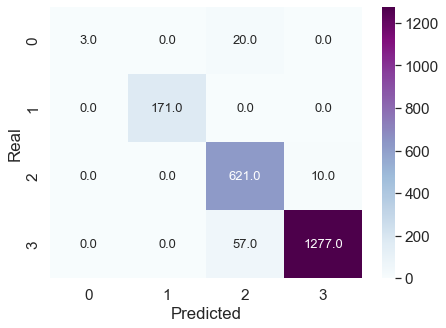

array([[   3,    0,   20,    0],
       [   0,  171,    0,    0],
       [   0,    0,  621,   10],
       [   0,    0,   57, 1277]], dtype=int64)

In [251]:
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(y_test, y_test_pred), cmap=plt.cm.BuPu, fmt='.1f' , annot=True, annot_kws={"size": 13}) # font size
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

confusion_matrix(y_test, y_test_pred)


## Nonlinear 

In [252]:
max_acc = 0
opt_C = 0
acc_list = []
for i in np.linspace(0.1,10,99):
    clf = SVC(C=i, tol=1e-4, max_iter=-1)
    clf.fit(x_train, y_train)
    y_valid_pred = clf.predict(x_valid)
    valid_acc = accuracy_score(y_true=y_valid, y_pred=y_valid_pred)
    acc_list.append(valid_acc*100)
    if (valid_acc > max_acc):
        max_acc = valid_acc
        opt_C = i

print(f"highest accuracy on validation set : {max_acc*100} for C = {opt_C}")

highest accuracy on validation set : 97.91666666666666 for C = 3.33265306122449


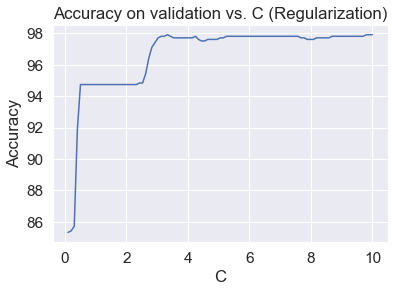

In [253]:
plt.plot(np.linspace(0.1,10,99),acc_list)
plt.title("Accuracy on validation vs. C (Regularization)")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.show()

In [254]:
acc = 0
_C = 0
acc_list = []
for i in np.logspace(-4,2,100):
    clf = SVC(C=i, tol=1e-4, max_iter=-1)
    clf.fit(x_train, y_train)
    y_valid_pred = clf.predict(x_valid)
    valid_acc = accuracy_score(y_true=y_valid, y_pred=y_valid_pred)
    acc_list.append(valid_acc*100)
    if (valid_acc > acc):
        acc = valid_acc
        _C = i

print(f"highest accuracy on validation set : {acc*100} for C = {_C}")

highest accuracy on validation set : 99.8015873015873 for C = 57.223676593502205


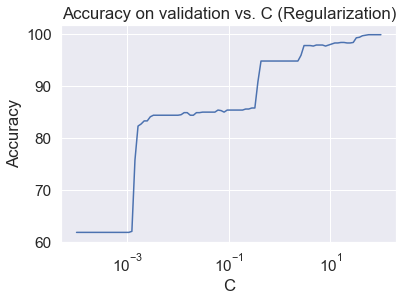

In [255]:
plt.plot(np.logspace(-4,2,100),acc_list)
plt.title("Accuracy on validation vs. C (Regularization)")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.show()

In [256]:
clf = SVC(C=_C, random_state=0, tol=5e-5, max_iter=10000)
clf.fit(x_train, y_train)

y_train_predicted = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print(f"accuracy on training set : {accuracy_score(y_true=y_train, y_pred=y_train_predicted)}")
print(f"accuracy on tes set : {accuracy_score(y_true=y_test, y_pred=y_test_pred)}")



accuracy on training set : 0.9987586891757696
accuracy on tes set : 0.999536822603057


In [257]:
print(f"number of support vectors = {clf.support_vectors_.shape[0]}")
clf.support_vectors_


number of support vectors = 224


array([[ 1.        ,  0.32268183,  0.36859815, ...,  6.        ,
         8.        , 51.        ],
       [ 1.        ,  0.32858085,  0.25385606, ...,  6.        ,
         8.        , 55.        ],
       [ 1.        ,  0.3749976 ,  0.33675185, ...,  6.        ,
         8.        , 53.        ],
       ...,
       [ 1.        ,  0.28187858,  0.88761337, ...,  4.        ,
         6.        , 45.        ],
       [ 1.        ,  0.47116293,  0.96206291, ...,  4.        ,
         6.        , 46.        ],
       [ 1.        ,  0.37569916,  0.37956259, ...,  4.        ,
         6.        , 47.        ]])

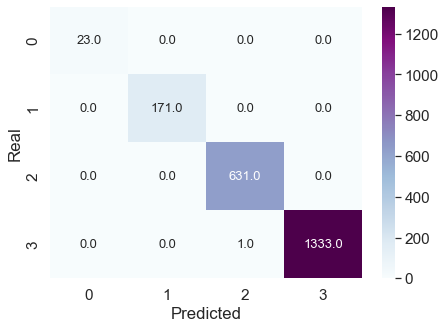

array([[  23,    0,    0,    0],
       [   0,  171,    0,    0],
       [   0,    0,  631,    0],
       [   0,    0,    1, 1333]], dtype=int64)

In [258]:
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(y_test, y_test_pred), cmap=plt.cm.BuPu, fmt='.1f' , annot=True, annot_kws={"size": 13}) # font size
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

confusion_matrix(y_test, y_test_pred)


## RBF and poly kernels

### RBF

In [259]:
# rbf
acc = 0
_C = 0
acc_list = []
for i in np.logspace(-4,2,100):
    clf = SVC(C=i, kernel='rbf', tol=1e-4, max_iter=-1)
    clf.fit(x_train, y_train)
    y_valid_pred = clf.predict(x_valid)
    valid_acc = accuracy_score(y_true=y_valid, y_pred=y_valid_pred)
    acc_list.append(valid_acc*100)
    if (valid_acc > acc):
        acc = valid_acc
        _C = i

print(f"highest accuracy on validation set : {acc*100} for C = {_C}")

clf = SVC(C=_C, kernel='rbf', tol=5e-5, max_iter=10000)
clf.fit(x_train, y_train)

y_train_predicted = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print(f"accuracy on training set : {accuracy_score(y_true=y_train, y_pred=y_train_predicted)}")
print(f"accuracy on tes set : {accuracy_score(y_true=y_test, y_pred=y_test_pred)}")


highest accuracy on validation set : 99.8015873015873 for C = 57.223676593502205
accuracy on training set : 0.9987586891757696
accuracy on tes set : 0.999536822603057


### poly

In [263]:
# rbf
acc = 0
_C = 0
acc_list = []
for i in np.logspace(-4,2,100):
    clf = SVC(C=i, kernel='poly', tol=1e-4, max_iter=-1)
    clf.fit(x_train, y_train)
    y_valid_pred = clf.predict(x_valid)
    valid_acc = accuracy_score(y_true=y_valid, y_pred=y_valid_pred)
    acc_list.append(valid_acc*100)
    if (valid_acc > acc):
        acc = valid_acc
        _C = i

print(f"highest accuracy on validation set : {acc*100} for C = {_C}")

clf = SVC(C=_C, kernel='poly', tol=5e-5, max_iter=10000)
clf.fit(x_train, y_train)

y_train_predicted = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print(f"accuracy on training set : {accuracy_score(y_true=y_train, y_pred=y_train_predicted)}")
print(f"accuracy on tes set : {accuracy_score(y_true=y_test, y_pred=y_test_pred)}")


highest accuracy on validation set : 98.80952380952381 for C = 86.97490026177834
accuracy on training set : 0.6690665342601787
accuracy on tes set : 0.651227420101899


C:\Users\98912\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## Cross Val

In [274]:
scores_clf = cross_val_score(clf, x, y, cv = 6, scoring='accuracy')
# print(f"accuracy with cross validation : {np.mean(scores_clf)}")

C:\Users\98912\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\98912\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\98912\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\98912\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\U

In [275]:
print(f"accuracy with cross validation : {np.mean(scores_clf)}")

accuracy with cross validation : 0.7402489342970994
